# Tarea - escalamiento y transformación
En el archivo `Escalamiento.xlsx` se encuentran dos variables, las cuales se pretenden analizar para una posterior predicción.

Se entrenará una red neuronal con la variable $x_1$ usando una función de activación sigmoidal unipolar, y la variable $x_2$ se usará para entrenar una red neuronal con una función de activación de tangente hiperbólica.

Use el escalamiento adecuado para cada variable con la finalidad de que la red neuronal opere en el rango de cada función de activación.

Transforme cada variable usando una función del tipo $\sqrt[a]{x}$, donde $a\in\mathbb{R}$, con el fin de obtener un sesgo cercano a cero y evalue si existen datos atípicos con el criterio de $1.5$ veces el rango intercuartílico por encima y por debajo de $Q_3$ y $Q_1$ para cada variable.

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [21]:
df = pd.read_excel('Escalamiento.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3287 non-null   float64
 1   x2      3287 non-null   float64
dtypes: float64(2)
memory usage: 51.5 KB


array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>]],
      dtype=object)

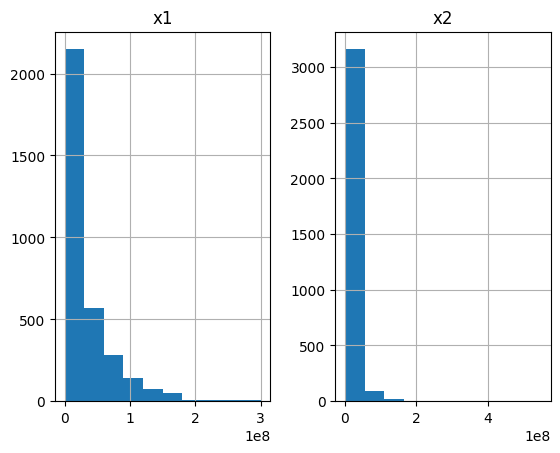

In [3]:
df.hist()

In [4]:
df.skew()

x1     2.335082
x2    10.565184
dtype: float64

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>]],
      dtype=object)

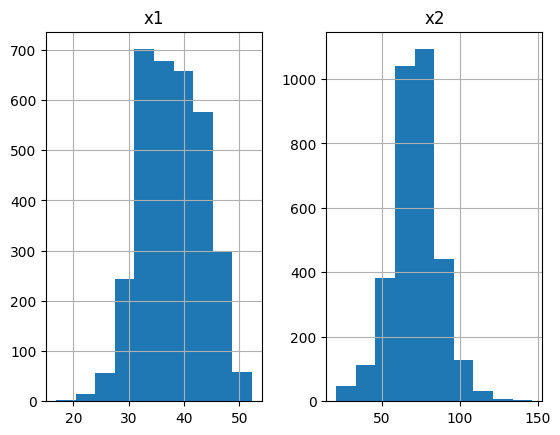

In [22]:
df['x1'],_ = boxcox(np.asarray(df.x1))
df['x2'],_ = boxcox(np.asarray(df.x2))
df.hist()

In [23]:
df.skew()

x1   -0.017029
x2    0.097609
dtype: float64

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>]],
      dtype=object)

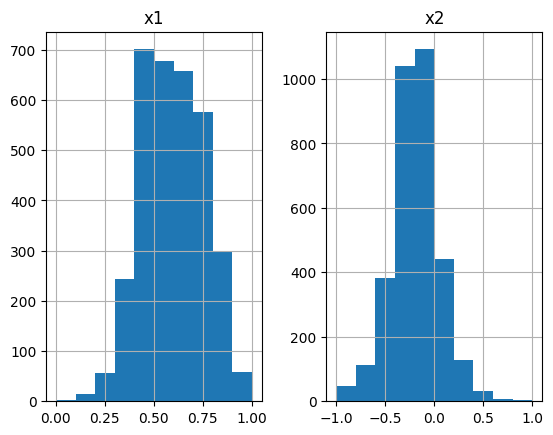

In [34]:
scalerSig = MinMaxScaler(feature_range=(0,1))
df[['x1']] = scalerSig.fit_transform(df[['x1']])

scalerTan = MinMaxScaler(feature_range=(-1,1))
df[['x2']] = scalerTan.fit_transform(df[['x2']])
df.hist()


In [25]:
df.skew()

x1   -0.017029
x2    0.097609
dtype: float64

<Axes: >

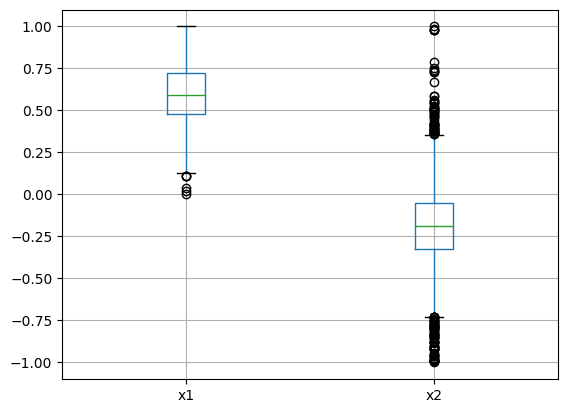

In [35]:
df.boxplot()